In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = '../data/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path)

In [3]:
df[:5]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
# Cria nova coluna com o valor total 
df['total_value'] = df['transaction_qty'] * df['unit_price']

## Distribuição das Vendas por Loja

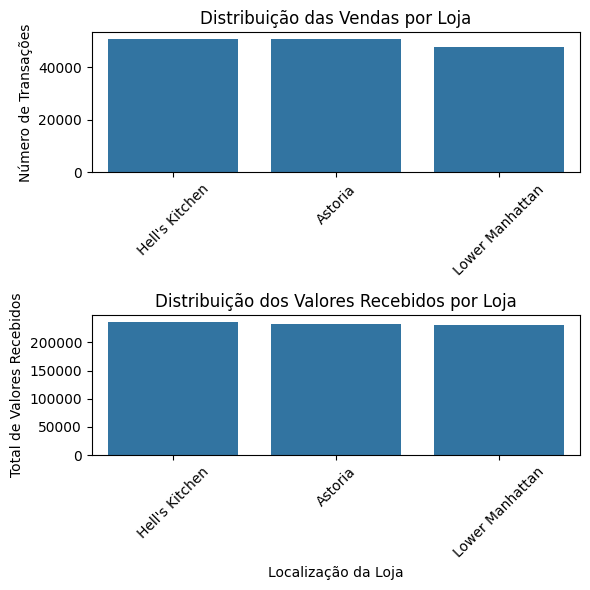

In [5]:
# Calcula a distribuição das vendas por loja
sales_count_by_store = df['store_location'].value_counts()

# Calcula a distribuição dos valores recebidos por loja
sales_value_by_store = df.groupby('store_location')['total_value'].sum().sort_values(ascending=False)

# Criar subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# Plot da distribuição das vendas por loja
sns.countplot(ax=axes[0], data=df, x='store_location', order=sales_count_by_store.index)
axes[0].set_title('Distribuição das Vendas por Loja')
axes[0].set_xlabel('')
axes[0].set_ylabel('Número de Transações')
axes[0].tick_params(axis='x', rotation=45)

# Plot da distribuição dos valores recebidos por loja
sns.barplot(ax=axes[1], x=sales_value_by_store.index, y=sales_value_by_store.values)
axes[1].set_title('Distribuição dos Valores Recebidos por Loja')
axes[1].set_xlabel('Localização da Loja')
axes[1].set_ylabel('Total de Valores Recebidos')
axes[1].tick_params(axis='x', rotation=45)

# Ajuste do layout
plt.tight_layout()
plt.show()

#### Observação:
- As 3 lojas tem volume similar de vendas e valores

## Distribuição das Vendas por Categoria de Produto

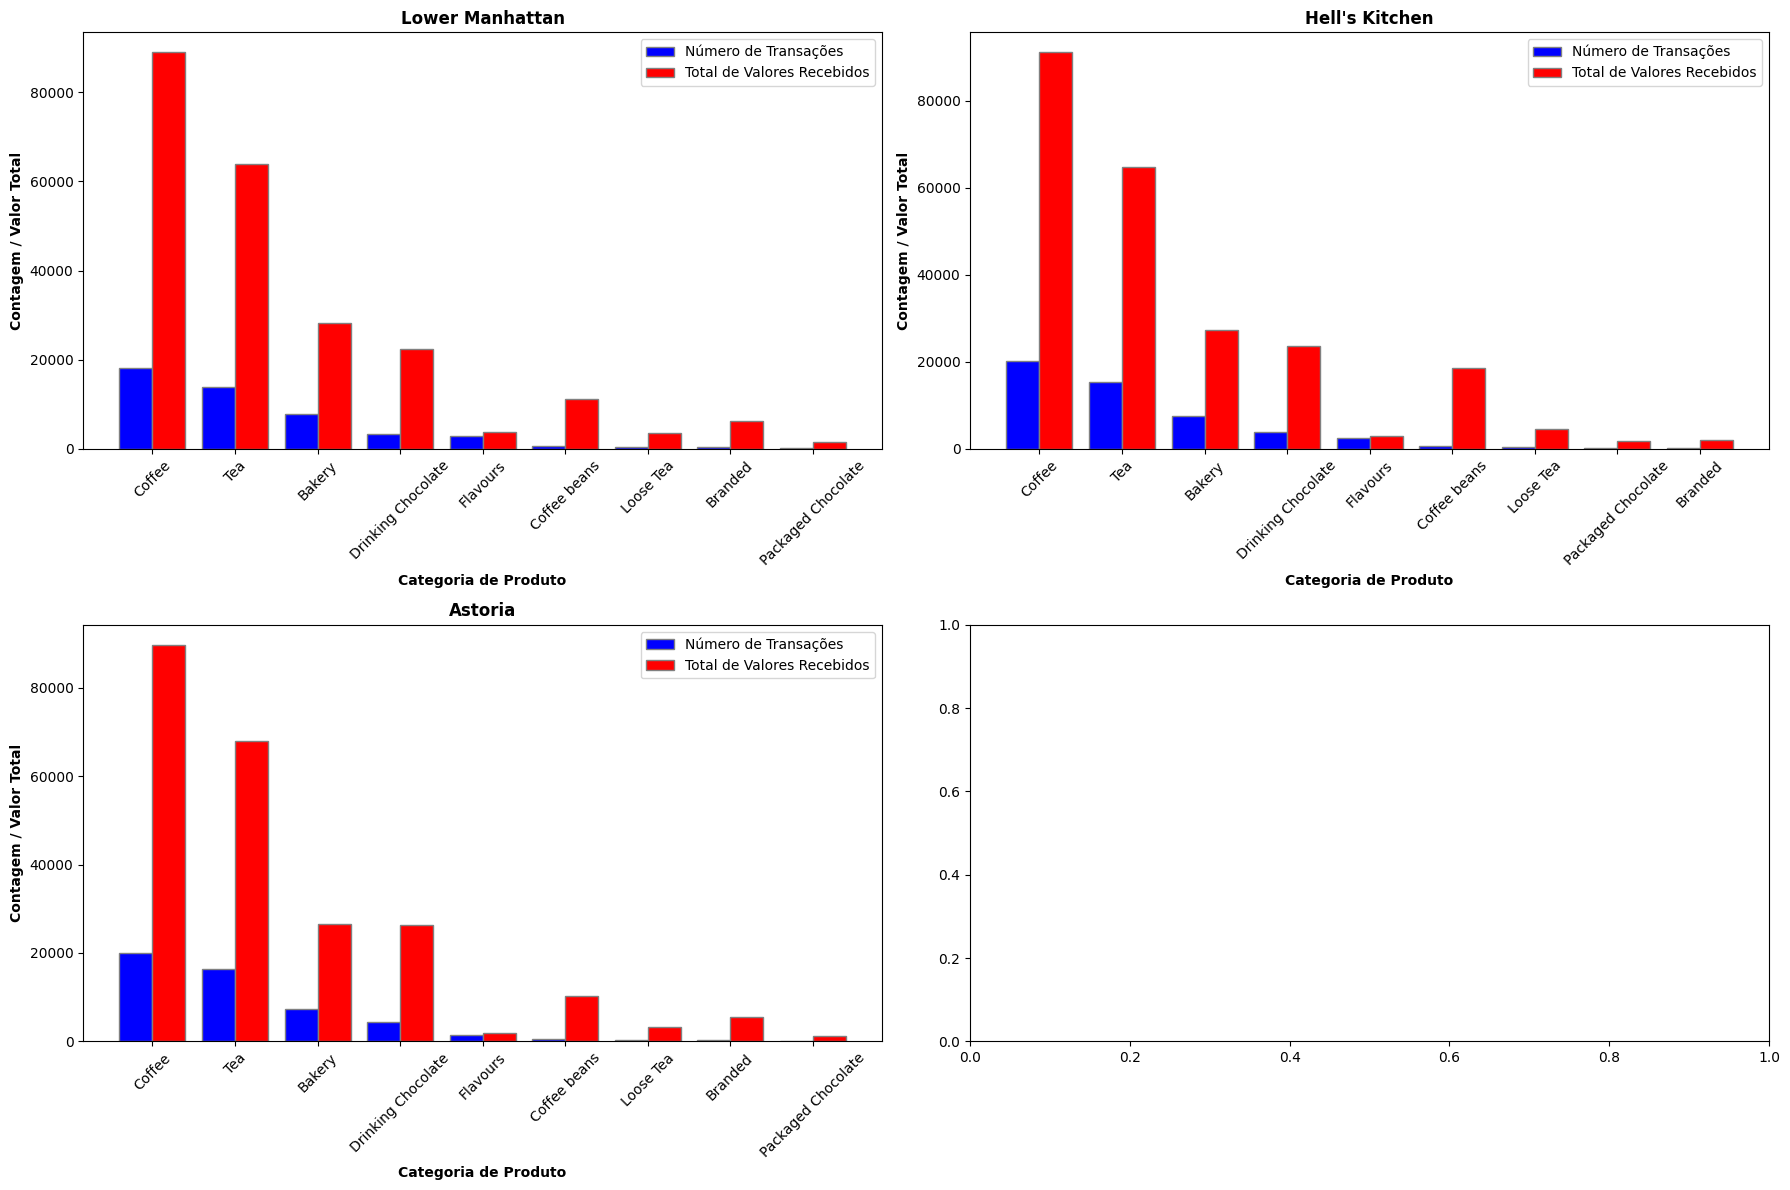

In [6]:
# Lista todas as localidades únicas
store_locations = df['store_location'].unique()

# Define o número de colunas para o layout dos subplots
num_cols = 2
num_rows = (len(store_locations) + 1) // num_cols

# Cria subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

# Itera sobre cada localidade e cria o gráfico correspondente
for i, location in enumerate(store_locations):
    # Filtra os dados pela localidade atual
    df_location = df[df['store_location'] == location]
    
    # Calcula o número de vendas por categoria de produto
    product_sales_count = df_location['product_category'].value_counts()
    
    # Calcula o valor total recebido por categoria de produto
    product_sales_value = df_location.groupby('product_category')['total_value'].sum().sort_values(ascending=False)
    
    # Ordem dos produtos com base na quantidade de vendas
    product_order = product_sales_count.index
    
    # Posições das barras
    bar_width = 0.4
    r1 = np.arange(len(product_sales_count))
    r2 = [x + bar_width for x in r1]
    
    # Cria o gráfico de barras duplas lado a lado para a localidade atual
    axes[i].bar(r1, product_sales_count[product_order], color='b', width=bar_width, edgecolor='grey', label='Número de Transações')
    axes[i].bar(r2, product_sales_value[product_order], color='r', width=bar_width, edgecolor='grey', label='Total de Valores Recebidos')
    
    # Adiciona detalhes ao gráfico
    axes[i].set_xlabel('Categoria de Produto', fontweight='bold')
    axes[i].set_ylabel('Contagem / Valor Total', fontweight='bold')
    axes[i].set_title(f'{location}', fontweight='bold')
    axes[i].set_xticks([r + bar_width/2 for r in range(len(product_sales_count))])
    axes[i].set_xticklabels(product_order, rotation=45)
    axes[i].legend()

# Ajuste do layout
plt.tight_layout()
plt.show()

#### Observação:
- As categorias de produtos que geram mais receita também são as que são mais vendidas nas 3 cafeterias:
  - Coffee
  - Tea
  - Bakery
  - Drinking Chocolate